In [1]:
import supy as sp
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from gr_recalc import gr_recalc

In [2]:

path_runcontrol= 'C:\Handledning_Julia\RunControl.nml'

df_state_init = sp.init_supy(path_runcontrol)
df_forcing = sp.load_forcing_grid(path_runcontrol, 1)

base_roof = df_state_init.copy().loc[1] # Base scenario 0% Green roof
green_roof= df_state_init.copy().loc[2] # Green Roof scenario 100%

## Scenario 75% Green Roof
df_state_init.loc[3] = green_roof.copy()
df_state_init.loc[3] = gr_recalc(df_state_init.loc[3], base_roof, green_roof, .25, .75)

## Scenario 50% Green Roof
df_state_init.loc[4] = green_roof.copy()
df_state_init.loc[4] = gr_recalc(df_state_init.loc[4], base_roof, green_roof, .50, .50)

## Scenario 25% green Roof
df_state_init.loc[5] = green_roof.copy()
df_state_init.loc[5] = gr_recalc(df_state_init.loc[5], base_roof, green_roof, .75, .25)

## Scenario 10% green Roof
df_state_init.loc[6]= green_roof.copy()
df_state_init.loc[6] = gr_recalc(df_state_init.loc[6], base_roof, green_roof, .90, .10)




2021-03-17 09:31:52,586 - SuPy - INFO - All cache cleared.
2021-03-17 09:31:53,812 - SuPy - INFO - All cache cleared.


In [3]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

base    = df_output.loc[1] # 0% Green Roof
gr_100  = df_output.loc[2] # 100% Green Roof
gr_75   = df_output.loc[3] # 75% Green Roof
gr_50   = df_output.loc[4] # 50% Green Roof
gr_25   = df_output.loc[5] # 25% Green Roof
gr_10   = df_output.loc[6] # 10% Green Roof

df_output_merge_x=pd.concat([base, gr_100, gr_75, gr_50, gr_25, gr_10],axis=1,join='inner',keys=['base','gr_100','gr_75','gr_50','gr_25','gr_10']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

df_merge = df_output_merge_x.SUEWS

2021-03-17 09:31:56,032 - SuPy - INFO - ====================
2021-03-17 09:31:56,032 - SuPy - INFO - Simulation period:
2021-03-17 09:31:56,032 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-03-17 09:31:56,032 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-03-17 09:31:56,032 - SuPy - INFO - 
2021-03-17 09:31:56,040 - SuPy - INFO - No. of grids: 6
2021-03-17 09:31:56,040 - SuPy - INFO - SuPy is running in serial mode
2021-03-17 09:37:52,845 - SuPy - INFO - Execution time: 356.8 s
2021-03-17 09:37:52,846 - SuPy - INFO - ====================



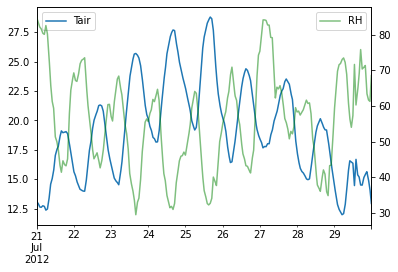

In [60]:
s = '2012 07 21'
e = '2012 07 29'
ax  =df_forcing.loc[s:e,'Tair'].plot()
ax2 = ax.twinx()
ax2  =df_forcing.loc[s:e,'RH'].plot(ax = ax2, color='g', alpha = 0.5)
ax.legend(loc='upper left')
ax2.legend()


<AxesSubplot:xlabel='datetime'>

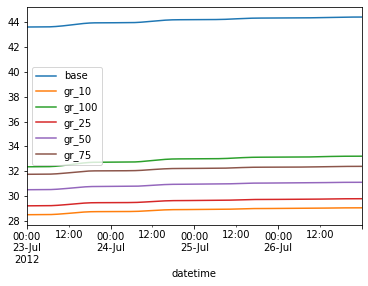

In [62]:
s = '2012 07 23'
e = '2012 07 26'
df_merge.loc[s:e, 'SMD'].plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='47eba28b-4b8c-411b-b9d3-4052f734cfa5'>)

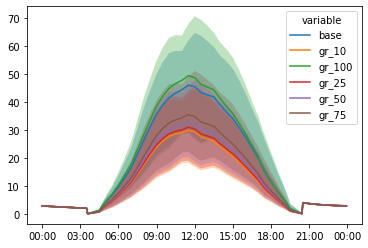

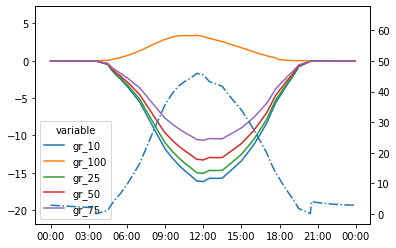

In [63]:

sp.util.plot_day_clm(df_merge.loc[s:e,'QE'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QE'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='a10d9175-dbd9-42df-9b8f-f59a0f01ac26'>)

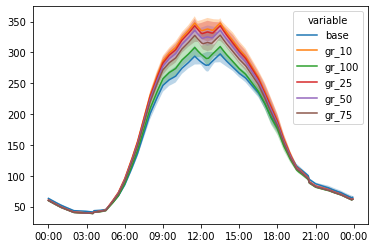

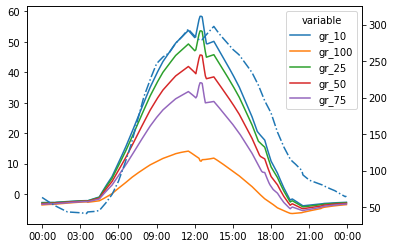

In [64]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QH'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='55d67c27-2185-4a22-a797-32deaa676b4d'>)

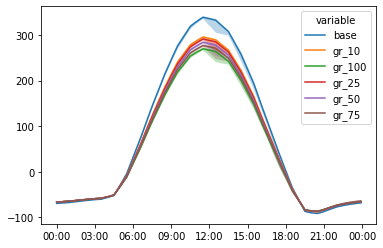

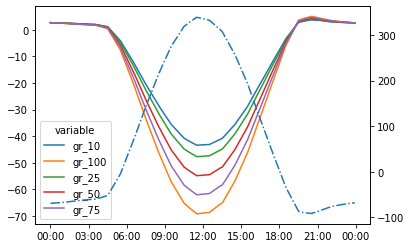

In [6]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QS'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QS'],show_dif =True, col_ref =('base'))


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='3e4b32e1-74d9-4fc5-b164-c9e050f88ebe'>)

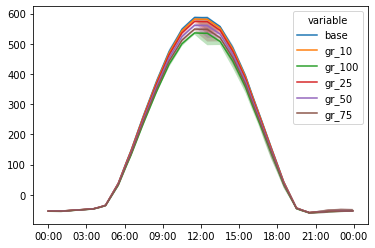

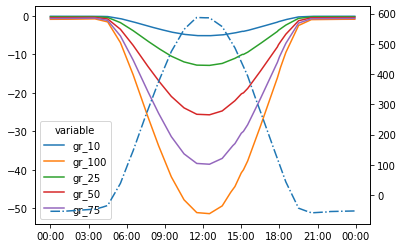

In [7]:
sp.util.plot_day_clm(df_merge.loc[s:e,'QN'])
sp.util.plot_day_clm(df_merge.loc[s:e,'QN'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='c5efab57-5e9d-45fe-a161-aba59a1a9d00'>)

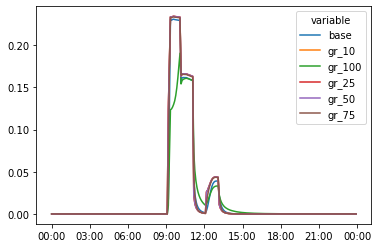

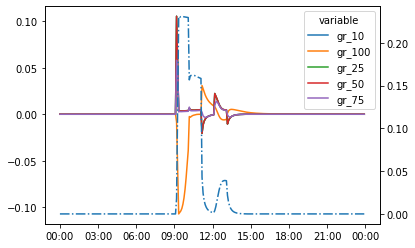

In [12]:
sp.util.plot_day_clm(df_merge.loc['2012 08 05':'2012 08 05','RO'])
sp.util.plot_day_clm(df_merge.loc['2012 08 05':'2012 08 05','RO'],show_dif =True, col_ref =('base'))

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:label='8da95166-f4dc-40ce-8d24-f6057be1f3fa'>)

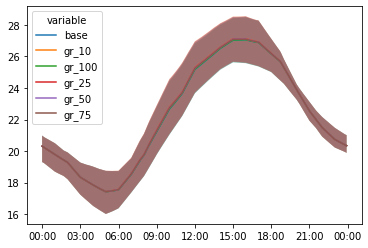

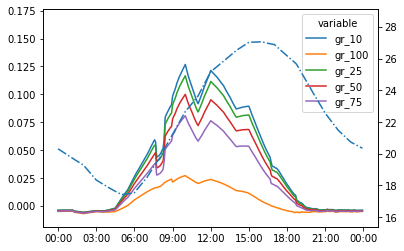

In [8]:
sp.util.plot_day_clm(df_merge.loc[s:e,'T2'])
sp.util.plot_day_clm(df_merge.loc[s:e,'T2'],show_dif =True, col_ref =('base'))

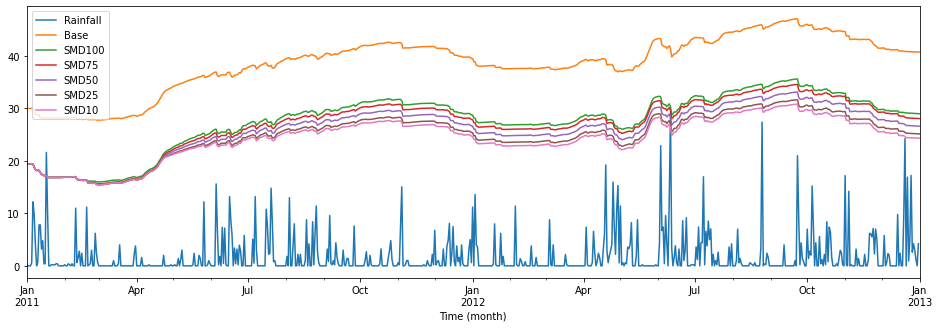

In [30]:
df_dailystate = (
    df_output.loc[1, "DailyState"].dropna(how="all").resample("1d").mean()
)
# daily rainfall
ser_p = df_dailystate.P_day.rename("Rainfall")
ser_smd = base.SUEWS.SMD
ser_smd_dmax = ser_smd.resample("1d").max().rename("Base")

smd_100 = gr_100.SUEWS.SMD
ser_100_max = smd_100.resample("1d").max().rename("SMD100")

smd_75 = gr_75.SUEWS.SMD
ser_75_max = smd_75.resample("1d").max().rename("SMD75")

smd_50 = gr_50.SUEWS.SMD
ser_50_max = smd_50.resample("1d").max().rename("SMD50")

smd_25 = gr_25.SUEWS.SMD
ser_25_max = smd_25.resample("1d").max().rename("SMD25")

smd_10 = gr_10.SUEWS.SMD
ser_10_max = smd_10.resample("1d").max().rename("SMD10")

ax = pd.concat([ser_p, ser_smd_dmax,ser_100_max,ser_75_max,ser_50_max,ser_25_max,ser_10_max], axis=1).plot(secondary_y="SMD", figsize=(16, 5))
_ = ax.set_xlabel("Time (month)")



In [5]:
def gr_recalc(scenario, df_base, df_gr, base_weight, gr_weight):

    def gr_calc(b_var,gr_var,b_weight, gr_weight):
        out = np.average([b_var,gr_var], weights=[b_weight,gr_weight])
        return out

    df_base_init = df_base
    base_soildepth = df_base_init.soildepth[1]
    base_sathydr = df_base_init.sathydraulicconduct[1]
    base_albedo = df_base_init.alb[1] # building Albedo
    base_emissivity = df_base_init.emis[1] # building Emissivity
    base_dr1 = df_base_init.storedrainprm.iloc[15] # drainage coeff_1
    base_dr2 = df_base_init.storedrainprm.iloc[22] # drainage coeff_2
    base_st_min = df_base_init.storedrainprm.iloc[1] # Storage Min
    base_st_min2 = df_base_init.storedrainprm.iloc[36] # Storage min 2
    base_st_max = df_base_init.storedrainprm.iloc[29] # Storage Max

    # Green roof from NonVeg
    df_gr_init = df_gr
    gr_soildepth = df_gr_init.soildepth[1]
    gr_sathydr = df_gr_init.sathydraulicconduct[1]
    gr_albedo = df_gr_init.alb[1] # building Albedo
    gr_emissivity = df_gr_init.emis[1] # building Emissivity
    gr_dr1 = df_gr_init.storedrainprm.iloc[15] # drainage coeff_1
    gr_dr2 = df_gr_init.storedrainprm.iloc[22] # drainage coeff_2
    gr_st_min = df_gr_init.storedrainprm.iloc[1] # Storage Min
    gr_st_min2 = df_gr_init.storedrainprm.iloc[35] # Storage Min2
    gr_st_max = df_gr_init.storedrainprm.iloc[29] # Storage Max


    base_list = [base_soildepth,base_sathydr,base_albedo,base_emissivity,base_dr1,base_dr2,base_st_min,base_st_min2,base_st_max]
    gr_list = [gr_soildepth,gr_sathydr,gr_albedo,gr_emissivity,gr_dr1,gr_dr2,gr_st_min,gr_st_min2,gr_st_max]

    scenario.soildepth[1]             = gr_calc(base_init.soildepth[1], gr_init.soildepth[1], base_weight, gr_weight)
    scenario.sathydraulicconduct[1]   = gr_calc(base_list[1],gr_list[1], base_weight, gr_weight)
    scenario.alb[1]                   = gr_calc(base_list[2],gr_list[2], base_weight, gr_weight) # building Albedo
    scenario.emis[1]                  = gr_calc(base_list[3],gr_list[3], base_weight, gr_weight)# building Emissivity
    scenario.storedrainprm.iloc[15]   = gr_calc(base_list[4],gr_list[4], base_weight, gr_weight) # drainage coeff_1
    scenario.storedrainprm.iloc[22]   = gr_calc(base_list[5],gr_list[5], base_weight, gr_weight)# drainage coeff_2
    scenario.storedrainprm.iloc[1]    = gr_calc(base_list[6],gr_list[6], base_weight, gr_weight) # Storage Min
    scenario.storedrainprm.iloc[35]   = gr_calc(base_list[7],gr_list[7], base_weight, gr_weight) # Storage Min2
    scenario.storedrainprm.iloc[29]   = gr_calc(base_list[8],gr_list[8], base_weight, gr_weight) # Storage Max

    return scenario